## Gradient Descent on Boston Housing Dataset

### 1.1 Data Preprocessing


1. CRIM - per capita crime rate by town  
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
3. INDUS - proportion of non-retail business acres per town.  
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
5. NOX - nitric oxides concentration (parts per 10 million)  
6. RM - average number of rooms per dwelling  
7. AGE - proportion of owner-occupied units built prior to 1940  
8. DIS - weighted distances to five Boston employment centres  
9. RAD - index of accessibility to radial highways  
10. TAX - full-value property-tax rate per $10,000  
11. PTRATIO - pupil-teacher ratio by town  
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. LSTAT - % lower status of the population  

The value for prediction:  
MEDV - Median value of owner-occupied homes in $1000's


In [505]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn

In [506]:
# Importing the dataset
absolute_path = os.path.abspath(os.getcwd())
dataset = pd.read_csv(f'{absolute_path}/Data-Preprocessing/Datasets/HousingData.csv')
#Create a copy of the dataset
dataset_copy = dataset.copy()
#Calculate number of rows and columns in dataset
print(dataset.shape)
print(dataset.head())

print(len(dataset.columns))

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
14


In [507]:
dataset = dataset.dropna() #Drop all rows with NaN values
dataset.shape

(394, 14)

In [508]:
# Replace NaN values with the mean of the column
dataset_copy = dataset_copy.fillna(dataset.mean())
dataset_copy.shape

(506, 14)

In [509]:
# Normalize the dataset and the copy
dataset = (dataset - dataset.mean()) / dataset.std()
dataset_copy = (dataset_copy - dataset_copy.mean()) / dataset_copy.std()

In [510]:
# Split the dataset into X and y
X = dataset.iloc[:, :-1].values
X_copy = dataset_copy.iloc[:, :-1].values

y = dataset.iloc[:, -1].values
y_copy = dataset_copy.iloc[:, -1].values

X.shape, y.shape

((394, 13), (394,))

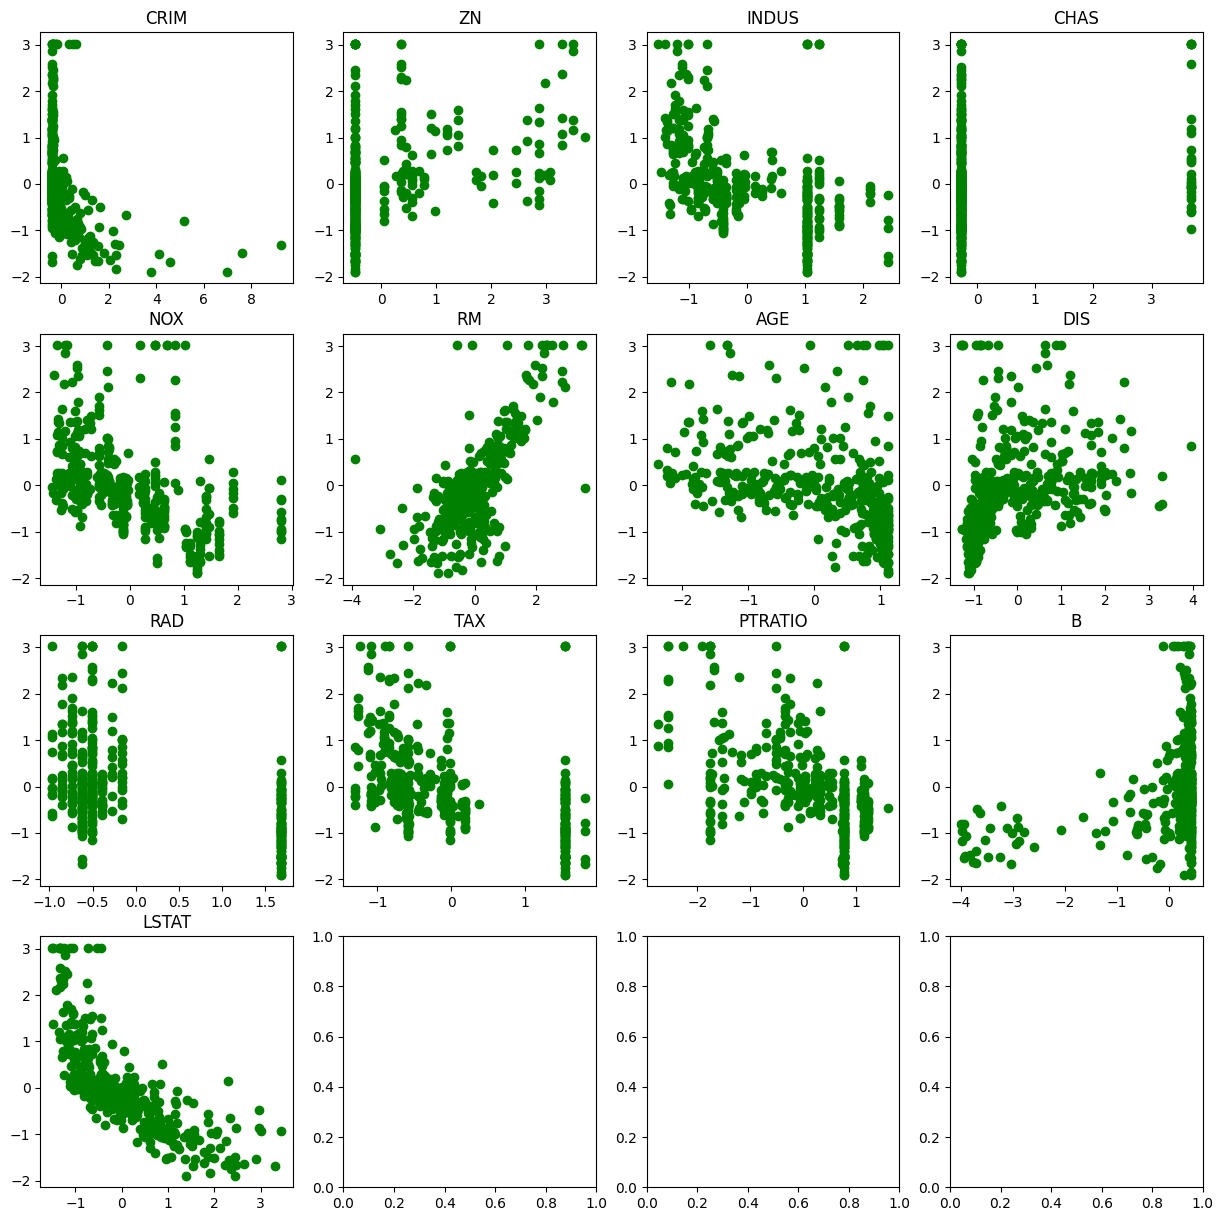

In [511]:
#plot subplots wrt to each feature
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i in range(4):
    for j in range(4):
        if 4*i+j<=12:
            axs[i,j].scatter(X[:,4*i+j], y, color = 'green')
            axs[i,j].set_title(dataset.columns[4*i+j])


In [512]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 5) #Split the dataset into train and test, 20% test data and 80% train data

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [513]:
# Add a column of ones to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

X_train.shape, X_test.shape

((404, 14), (102, 14))

### 1.2 Batch Gradient Descent


1. ![Cost Function](./images/cost_function.png)  
**This is the cost function to measure how close our predicted values (h(xi)) are close to corresponding y.**

2. ![Batch Gradient Descent](./images/batch_gradient_descent.png)   
**This is how the theta is updated at each step.**


In [514]:
## Batch Gradient Descent

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, X.shape[1]))
    for i in range(iterations):
        y_pred = X.dot(theta) #Predicted value of y using the current value of theta
        theta = theta - (1/m)*alpha*(X.T.dot(y_pred-y)) #Update theta based on the gradient descent rule
        theta_history[i,:] = theta.T
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history, theta_history

In [515]:
def predict(X, theta):
    """
    Predicts the value of y given X and theta
    """
    # Calculate the prediction
    prediction = X.dot(theta)
    return prediction

In [516]:
def rmse(prediction, y):
    """
    Calculates the root mean squared error between the prediction and the actual values
    """
    return np.sqrt(np.mean((prediction - y)**2))

In [517]:
theta,cost_history,theta_history = gradient_descent(X_train, y_train, theta, 0.01, 1000)
prediction = predict(X_test,theta)
rmse_num = rmse(prediction, y_test)
print('RMSE =', rmse_num)
print('Final cost =', cost_history[-1])
print('Final value of theta =', theta)
# print('cost_history =', cost_history)
# print('theta_history =', theta_history)

RMSE = 0.49601145613603553
Final cost = 0.1399359044706459
Final value of theta = [-0.01168031 -0.1115699   0.07660242 -0.07827093  0.09497614 -0.14838943
  0.30178893 -0.04213389 -0.30532578  0.17582163 -0.07766119 -0.20943422
  0.11709974 -0.40193195]


Text(0.5, 1.0, 'Actual vs Prediction')

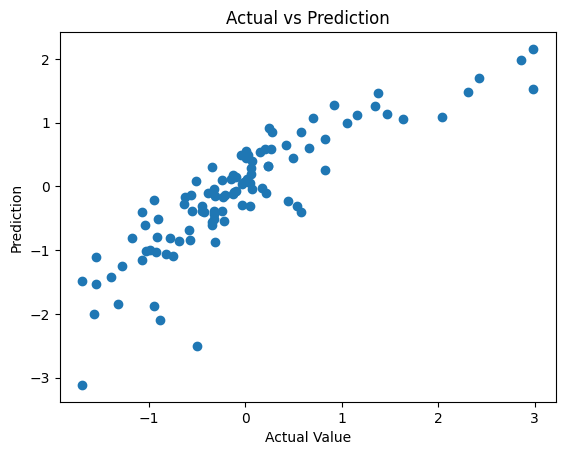

In [518]:
# Plot the prediction vs the actual values
plt.scatter(y_test, prediction)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction')

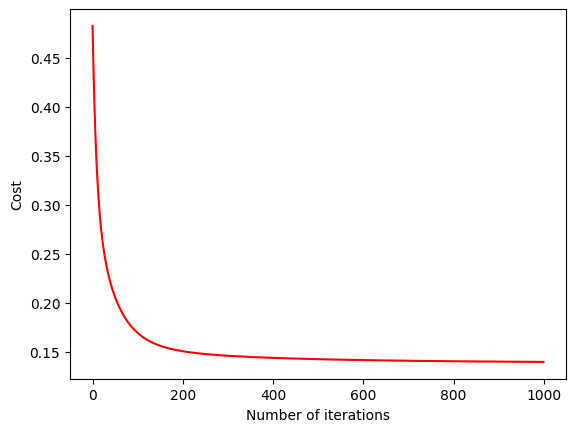

In [519]:
# Plot the cost history wrt the number of iterations

plt.plot(range(1000), cost_history, 'r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

### 1.2 Solving linear regression using Stochastic Gradient Descent

![Batch Gradient Descent](./images/stochastic_gd.png)   
**This is how the theta is updated at each step.**

In [520]:
theta = np.zeros(X_train.shape[1])

# Define the gradient descent function
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    num_of_samples = len(y)
    num_of_features = X.shape[1]
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, X.shape[1]))
    for k in range(iterations):
        for i in range(num_of_samples):
            y_pred = X.dot(theta) #Predicted value of y using the current value of theta
            for j in range(num_of_features):
                theta[j] = theta[j] - alpha*(y_pred[i]-y[i])*X[i][j]
        theta_history[k,:] = theta.T
        cost_history[k] = cost_function(X, y, theta)

    return theta, cost_history, theta_history

In [521]:
theta,cost_history,theta_history = stochastic_gradient_descent(X_train, y_train, theta, 0.01, 1000)
prediction = predict(X_test,theta)
rmse_num = rmse(prediction, y_test)
print('RMSE =', rmse_num)
print('Final cost =', cost_history[-1])
print('Final value of theta =', theta)
# print('cost_history =', cost_history)
# print('theta_history =', theta_history)

RMSE = 0.567440719108584
Final cost = 0.1692587069979181
Final value of theta = [ 0.02760826 -0.17977464  0.11776209 -0.10631856  0.05887597 -0.21886465
  0.32327544 -0.05956925 -0.29837087  0.28039918 -0.25623516 -0.24490199
  0.10508284 -0.36824674]


Text(0.5, 1.0, 'Actual vs Prediction')

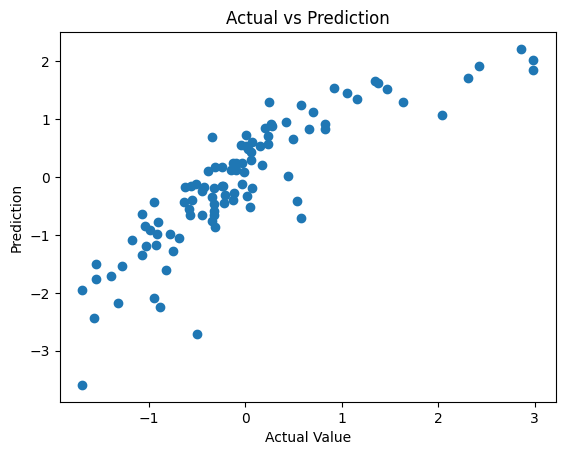

In [522]:
# Plot the prediction vs the actual values
plt.scatter(y_test[:100], prediction[:100])
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction')

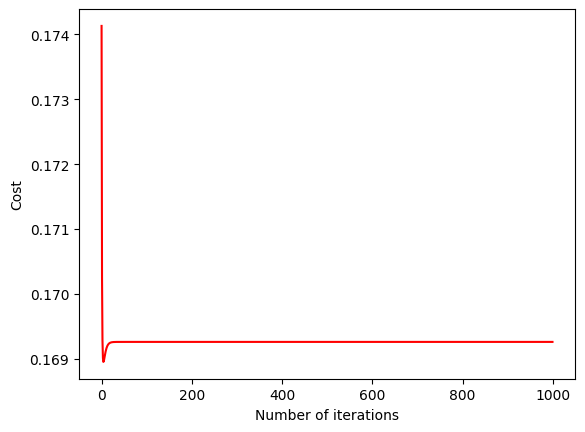

In [523]:
# Plot the cost history wrt the number of iterations

plt.plot(range(1000), cost_history, 'r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

### 1.3 Solving regression using Normal Equation

In [524]:
X_train.T.dot(X_train).shape


(14, 14)

In [525]:
def fit_with_normal_equation(X, y):
    """
    Fits the model using the normal equation
    """
    # Add a column of ones to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # Calculate theta using the normal equation
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # np.linalg.inv is used to compute the (multiplicative) inverse of a matrix.
    return theta

In [526]:
theta = fit_with_normal_equation(X, y)
prediction = predict(X_test,theta)
print(theta, prediction)

[-3.21566803e-16 -9.82282745e-02  1.28128122e-01  2.29541211e-02
  7.66240416e-02 -2.22304086e-01  3.26988071e-01 -3.96255565e-02
 -3.34769109e-01  2.69934642e-01 -2.42011379e-01 -2.16713375e-01
  9.42905371e-02 -3.38652758e-01] [ 1.14886316  1.1119472   0.48892119 -1.75411375  1.50066422 -1.70576668
  0.53034915  0.99639844  0.41160138 -0.04186209  1.08012758 -0.12076003
  0.07943575  1.22734877  0.66930829 -0.82345307 -2.25705956 -0.54275079
 -0.89804055 -0.93630017 -2.0056412  -0.2945801   1.73203294  0.19509871
  1.11596487 -1.21158439  0.24800942  0.03682214 -0.0292076  -0.17672264
 -0.62256704 -1.54352266 -0.45973687 -0.02775927  0.71580689 -0.35720853
  0.77883105 -1.38011089  1.98734093  1.35201848 -0.2587595  -1.91123457
  0.73737498 -1.11261643  0.53604048  0.93031077 -2.88274786 -0.17032985
 -0.17715377 -0.8906459  -0.20284435 -0.29879564  0.16928387 -0.92370057
 -0.61464403  0.30579968  1.42800186 -0.74877449  0.68221275 -0.08393228
 -0.23404002  0.33364457 -0.80489103  1.1

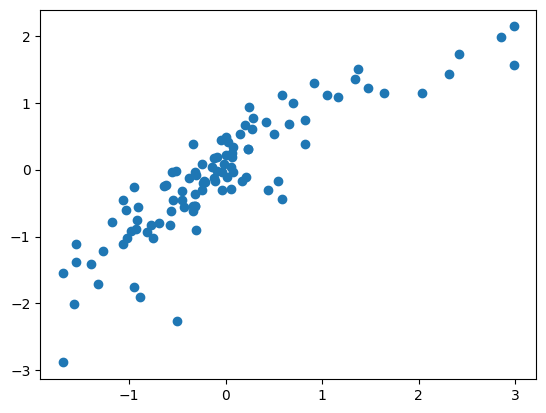

In [527]:
# Plot the prediction vs the actual values
plt.scatter(y_test, prediction)

In [528]:
# Find the RMSE

def rmse(prediction, y):
    """
    Calculates the root mean squared error between the prediction and the actual values
    """
    return np.sqrt(np.mean((prediction - y)**2))

rmse(prediction, y_test)

0.4642161383043372

#### 1.3.1 Normal Equation With Regularization

In [529]:
def normal_equation_regularized(X, y,reg_param=0.0):
    """
    Fits the model using the normal equation
    """
    # Add a column of ones to X
    # X = np.hstack((np.ones((X.shape[0], 1)), X))
    # Calculate theta using the normal equation
    theta = np.linalg.inv(X.T.dot(X) + reg_param*np.eye(X.T.shape[0])).dot(X.T).dot(y) # np.linalg.inv is used to compute the (multiplicative) inverse of a matrix.
    return theta


In [530]:
theta = normal_equation_regularized(X_train, y_train, reg_param=0.01)
prediction = predict(X_test,theta)

print(theta, prediction)

[-0.01377004 -0.12567966  0.09955373 -0.05274382  0.08918568 -0.19298294
  0.28328122 -0.03574957 -0.34702797  0.30441039 -0.19997366 -0.21948482
  0.11698171 -0.40365979] [ 1.07211627  0.97008937  0.54417438 -1.80180538  1.45702801 -1.81900384
  0.50791929  1.08376281  0.43742509 -0.00807731  1.09175609 -0.07524667
  0.10930661  1.21599927  0.64150997 -0.80903033 -2.42016294 -0.50665591
 -0.89257919 -1.05427286 -2.19802016 -0.38177235  1.72156574  0.19157966
  0.98142856 -1.24723599  0.28440668  0.06972916  0.02096254 -0.18746255
 -0.76562801 -1.69606012 -0.37183522  0.02500054  0.6828169  -0.45097466
  0.85342387 -1.50731827  1.96673425  1.30827121 -0.17930403 -2.12525803
  0.79824628 -1.15464515  0.46060572  0.8932959  -3.11132014 -0.41540375
 -0.19062618 -1.08130447 -0.18554285 -0.30583469  0.14096345 -1.02368195
 -0.64307908  0.26840745  1.43428984 -0.80636857  0.60708846 -0.1288614
 -0.20215726  0.41434725 -0.90060214  1.09510278  0.0690171  -1.08470897
 -0.34880132  0.31956541 -

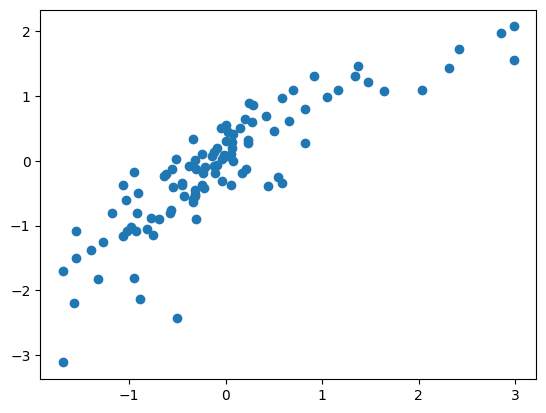

In [531]:
# Plot the prediction vs the actual values
plt.scatter(y_test, prediction)

In [532]:
# Find the RMSE

def rmse(prediction, y):
    """
    Calculates the root mean squared error between the prediction and the actual values
    """
    return np.sqrt(np.mean((prediction - y)**2))

rmse(prediction, y_test)

0.498740803321295